In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as scp
features=["dom_x", "dom_y", "dom_z", "time", "charge_log10"]

In [2]:
from dev.data_load import graph_data as gen
dataset=gen(n_data=1, restart=1)
idx_lists = dataset.index_lists

ModuleNotFoundError: No module named 'data_load'

In [185]:
dataset_train = dataset[idx_lists[0]]
dataset_val   = dataset[idx_lists[1]]
dataset_test  = dataset[idx_lists[2]]

In [186]:
dt=dataset_train

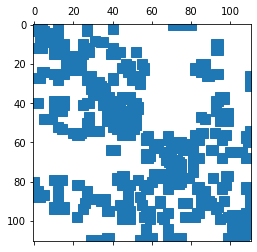

In [226]:
k=1
X, A, Y=dt[k].x, dt[k].a, dt[k].y
fig, ax=plt.subplots()
ax.spy(A)

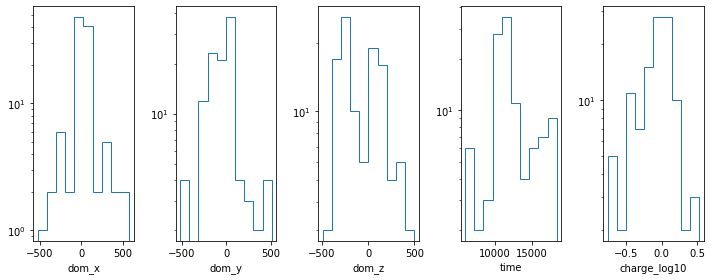

In [257]:
dx, dy, dz, t, q= X[:,0], X[:,1], X[:,2], X[:,3], X[:,4]
fig1, ax1=plt.subplots(nrows=1, ncols=5, figsize=(10,4))
for i in range(len(X[0])):
    ax1[i].hist(X[:,i], histtype='step')
    ax1[i].set(xlabel=features[i], yscale='log')
fig1.tight_layout()
ix, iy,_=scp.find(A)
adj=list(zip(ix,iy))

In [232]:
G=nx.Graph()
for i in np.arange(len(X[:,0])):
    G.add_node(i, x=X[i,0], y=X[i,1], z=X[i,2], t=X[i,3], q=X[i,4], pos2d=[X[i,0], X[i,1]] ,pos3d=[X[i,0], X[i,1],X[i,2]])
G.add_edges_from(adj)

# Plotting 3d graph

In [238]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline

In [258]:
def plot_3d(G, angle=45, save=False, degree=False):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos3d')
    ts = nx.get_node_attributes(G, 't')
    qs = nx.get_node_attributes(G, 'q')
    # Get number of nodes
    n = G.number_of_nodes()
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    # Define color range proportional to number of edges adjacent to a single node
    mint=min(ts.items(), key=lambda x: x[1])[1]
    tlist=[np.log(t)-np.log(mint) for key, t in ts.items()]
    colors=plt.cm.plasma(tlist)
    if degree:
        colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] #if centrality
    # 3D network plot
    central=np.array(list(nx.degree_centrality(G).values()))
    connect=nx.is_connected(G)
#     print(colors)
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            mapa=ax.scatter(xi, yi, zi, c=[colors[key]], s=10+50*10**(2*qs[key]), edgecolors='k', alpha=0.7)
#             print(50+10*10**(2*qs[key]))
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='k', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)
    # Hide the axes
#     ax.set_axis_off()
    cbar=fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(), cmap=plt.cm.plasma), ax=ax, shrink=0.8)
    ax.set(xlabel='dom_x', ylabel='dom_y', zlabel='dom_z')
    info=f'E: {10**Y[0]:.2f} GeV, Zenith: {Y[1]:.2f}, Azimuth:  {Y[2]:.2f} \n  Connected Graph: {connect}, Average centrality: {np.mean(central):.4f}'
    ax.set(title=info)
    if save:
     plt.savefig('graph3dtest.png')
     plt.close('all')
    else:
      plt.show()
    return

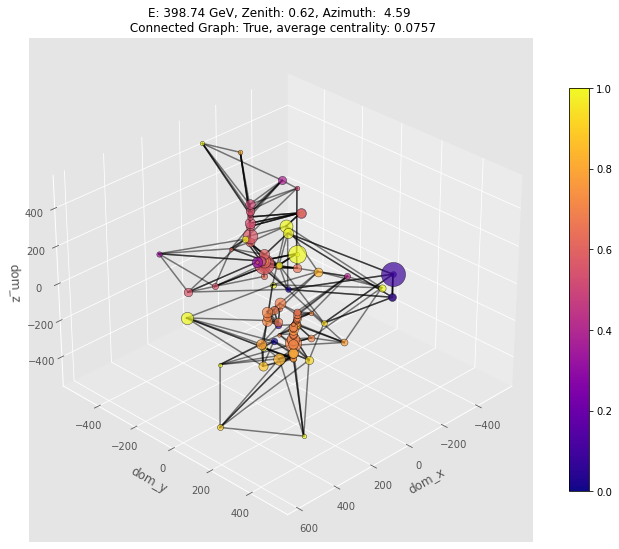

In [259]:
plot_3d(G)

In [142]:
pos = nx.get_node_attributes(G, 'pos3d')
